In [257]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2)

In [268]:
def solve_Euler( f, y0, h=0.1, N = 10 ):
    
    y = [y0]
    t = [0]
    for k in range(N):
        y_n = y[-1]
        t_n = t[-1]
        y_n_plus_un = y_n + h*f( t_n+h, y_n )
        
        y.append( y_n_plus_un )
        t.append( t_n + h )
        
    return t, y
        

## Ricardi's equation

$$
y' = (y-t)^2
$$
https://www.wolframalpha.com/input/?i=dy%2Fdt+%3D+(y-t)%5E2

$$
y(t) = \frac{2}{c\,exp(2t)+1} + t - 1
$$

$$
y(0) = y_0 = \frac{2}{c+1} - 1
$$

$$
c= \frac{2}{y_0 + 1} -1
$$

In [259]:
def y(t, y0):
    """Solution of the equation."""
    c = 2/(y0 + 1) -1
    return 2/( c*np.exp(2*t) + 1 ) + t - 1

def f(t, y):
    """f = y' """
    return (y - t)**2

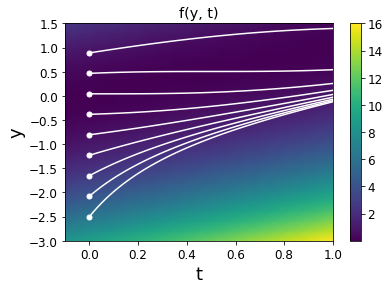

In [263]:
t_span = np.linspace( -.1, 1, 19 )
y_span = np.linspace( -3, 1.5, 23 )

t_grid, y_grid = np.meshgrid( t_span, y_span )

f_grid = f( t_grid, y_grid )

plt.pcolormesh(t_span, y_span, f_grid, shading='gouraud'); plt.title("f(y, t)");
plt.xlabel('t'); plt.ylabel('y'); plt.colorbar();

t_graph = np.linspace( 0, 1, 59 )
for y0 in np.linspace( -2.5, 8/9, 9 ):
    plt.plot( 0, y0, 'ow', markersize=5 );
    plt.plot( t_graph, y(t_graph, y0), '-w', linewidth=1.5 );

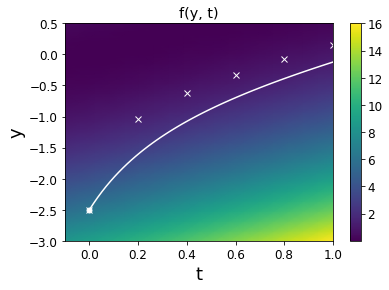

In [280]:
t_span = np.linspace( -.1, 1, 19 )
y_span = np.linspace( -3, 0.5, 23 )

t_grid, y_grid = np.meshgrid( t_span, y_span )

f_grid = f( t_grid, y_grid )

plt.pcolormesh(t_span, y_span, f_grid, shading='gouraud'); plt.title("f(y, t)");
plt.xlabel('t'); plt.ylabel('y'); plt.colorbar();

t_graph = np.linspace( 0, 1, 59 )
y0 = -2.5
plt.plot( 0, y0, 'ow', markersize=5 );
plt.plot( t_graph, y(t_graph, y0), '-w', linewidth=1.5 );

t_Euler, y_Euler = solve_Euler( f, y0, h=.2, N=5 )
plt.plot( t_Euler, y_Euler, 'wx' );

implicit Euler:

$$
y_{n+1} = y_{n} + f\big( t_n+h, \, y_{n+1}  \big)
$$

solve with fixed point:

$$
y_{n+1}^{(0)} = y_n \\
y^{(i+1)}_{n+1} = y_{n} + f\big( t_n+h, \, y^{(i)}_{n+1}  \big)
$$

... runge-kutta ?

$$
y^{(i+1)}_{n+1} = y_{n} + f\big( t_n+h, \, y_{n} + f\big( t_n+h, \, y^{(i)}_{n+1}  \big)  \big)
$$

In [295]:
y_i = y0
yn = y0
h = .2
t_n = 0
for i in range(5):
    y_i_plus_un = yn + h*f( t_n+h, y_i )
    y_i = y_i_plus_un

In [296]:
y_i

-1.5181572277793354

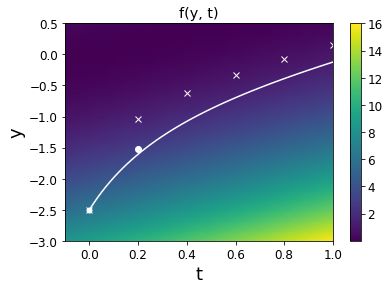

In [297]:
t_span = np.linspace( -.1, 1, 19 )
y_span = np.linspace( -3, 0.5, 23 )

t_grid, y_grid = np.meshgrid( t_span, y_span )

f_grid = f( t_grid, y_grid )

plt.pcolormesh(t_span, y_span, f_grid, shading='gouraud'); plt.title("f(y, t)");
plt.xlabel('t'); plt.ylabel('y'); plt.colorbar();

t_graph = np.linspace( 0, 1, 59 )
y0 = -2.5
plt.plot( 0, y0, 'ow', markersize=5 );
plt.plot( t_graph, y(t_graph, y0), '-w', linewidth=1.5 );

t_Euler, y_Euler = solve_Euler( f, y0, h=.2, N=5 )
plt.plot( t_Euler, y_Euler, 'wx' );

plt.plot( t_n+h, y_i, 'wo' );